In [1]:
#Cargando librerías de manipulación y visualización de datos
import pandas as pd
from pathlib import Path
import sys
import numpy as np
# Usamos la carpeta actual del notebook como punto de partida
   # sube un nivel desde notebooks/
root_dir = Path().resolve().parent
sys.path.append(str(root_dir))

from codes.data_analyzer import DataAnalyzer

analizador = DataAnalyzer()

In [2]:
#Lectura del dataframe
df = analizador.lectura_csv()

2025-10-02 12:42:24,961 [INFO] Leyendo CSV desde: /home/cesar/Escritorio/Challenge Meli/test_meli/data/new_items_dataset.csv
/home/cesar/Escritorio/Challenge Meli/test_meli/codes/data_analyzer.py:23: DtypeWarning: Columns (10,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(ruta)


In [3]:
#Vistazo a la estructura del dataframe
df.head()

,id,title,date_created,base_price,price,category_id,tags,attributes,variations,pictures,...,shipping_mode,shipping_admits_pickup,shipping_is_free,status,sub_status,warranty,is_new,initial_quantity,sold_quantity,available_quantity
0,MLA578569012,Escritorio Secretter Espectacular,2015-09-08T21:17:57.000Z,6700.0,6700.0,MLA1902,['dragged_bids_and_visits'],[],[],"[{'size': '500x375', 'secure_url': 'https://a2...",...,custom,True,False,active,NaN,NaN,0,1.0,0.0,1.0
1,MLA576883746,Stassen Espatulas Milenio Numero 3 Codigo 590-3,2015-08-29T12:55:03.000Z,119.0,119.0,MLA3530,['dragged_bids_and_visits'],[],[],"[{'size': '500x375', 'secure_url': 'https://a2...",...,not_specified,False,False,active,NaN,Sí,1,19.0,0.0,19.0
2,MLA581002506,Charm Britania Plata 925 Ovalado!!! Armá La Tu...,2015-09-23T12:41:07.000Z,450.0,450.0,MLA6440,['dragged_bids_and_visits'],[],[],"[{'size': '312x308', 'secure_url': 'https://a2...",...,me2,False,False,active,NaN,Sí,1,2.0,0.0,2.0
3,MLA574707083,El Hombre De Magallanes Virginia Carreño Novela,2015-08-16T13:34:01.000Z,40.0,40.0,MLA2044,['dragged_bids_and_visits'],[],[],"[{'size': '375x500', 'secure_url': 'https://a2...",...,me2,True,False,active,NaN,Sí,0,1.0,0.0,1.0
4,MLA576209717,Molde Placa Boca Espejo Bota Labial Chupetin P...,2015-08-25T14:42:20.000Z,30.0,30.0,MLA34294,['dragged_bids_and_visits'],[],[],"[{'size': '396x500', 'secure_url': 'https://a2...",...,not_specified,True,False,active,NaN,NaN,1,1.0,1.0,1.0


In [4]:
#Resumen estadístico de los precios base y con descuento
analizador.resumen_variable(df,['base_price','price'])

,index,base_price,price
0,count,9.999600e+04,9.999200e+04
1,mean,5.506793e+04,5.252846e+04
2,median,2.500000e+02,2.500000e+02
3,std,8.632656e+06,8.623472e+06
4,sum,5.506573e+09,5.252425e+09
5,min,8.400000e-01,8.400000e-01
6,max,2.222222e+09,2.222222e+09


In [5]:
#Análisis estadístico de las cantidades de los productos
analizador.resumen_variable(df,['available_quantity','sold_quantity','initial_quantity'])

##Se deteca una alerta en la variable available_quantity, ya que el mínimo es un número negativo y además decimal, posible inconsistencia.

,index,available_quantity,sold_quantity,initial_quantity
0,count,9.999600e+04,99996.000000,9.999600e+04
1,mean,3.484037e+01,2.397116,3.509370e+01
2,median,1.000000e+00,0.000000,1.000000e+00
3,std,4.208171e+02,42.685927,4.210845e+02
4,sum,3.483897e+06,239702.000000,3.509230e+06
5,min,-5.842284e+01,0.000000,0.000000e+00
6,max,9.999000e+03,8676.000000,9.999000e+03


In [6]:
#Calculando el porcentaje de na's para cada una de las variables
analizador.calcular_porcentaje_nas(df)
#Se deteca un patrón de 4 registros con na's en la mayoría de variables
#Además las variables sub_status y warranty en su mayoría son nulas (posible decisión: eliminarlas del análisis)

,columna,porcentaje de na's,numero_na's
0,sub_status,99.014,99014.0
1,warranty,60.894,60894.0
2,seller_city,0.008,8.0
3,price,0.008,8.0
4,seller_country,0.007,7.0
5,seller_province,0.007,7.0
6,seller_loyalty,0.004,4.0
7,sold_quantity,0.004,4.0
8,initial_quantity,0.004,4.0
9,status,0.004,4.0


In [7]:
df[df['seller_id'].isna()]

,id,title,date_created,base_price,price,category_id,tags,attributes,variations,pictures,...,shipping_mode,shipping_admits_pickup,shipping_is_free,status,sub_status,warranty,is_new,initial_quantity,sold_quantity,available_quantity
3108,MLA583658384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Envios a capital federal $33.,0,NaN,NaN,NaN
26694,MLA583657737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Envios a capital federal $26.,0,NaN,NaN,NaN
93020,MLA575953434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4 meses de Garantía,0,NaN,NaN,NaN
93842,MLA583439922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Envios capital federeal $26.,0,NaN,NaN,NaN


In [8]:
df[df['seller_city'].isna()]

,id,title,date_created,base_price,price,category_id,tags,attributes,variations,pictures,...,shipping_mode,shipping_admits_pickup,shipping_is_free,status,sub_status,warranty,is_new,initial_quantity,sold_quantity,available_quantity
3108,MLA583658384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Envios a capital federal $33.,0,NaN,NaN,NaN
3403,MLA537094206,"Alquilo Duplex 3 Amb,a 3 Cuadras De Playa,y A ...",2014-12-13T21:15:41.000Z,600.0,600.0,MLA50278,['dragged_visits'],"[{'value_id': '', 'attribute_group_id': 'ADICI...",[],"[{'size': '500x374', 'secure_url': 'https://a2...",...,not_specified,False,False,active,NaN,NaN,0,1.0,0.0,1.0
7518,MLA579422455,"Garrafa R22 Kg13,600",2015-09-14T13:46:27.000Z,1850.0,1850.0,MLA81238,['dragged_bids_and_visits'],[],[],"[{'size': '500x375', 'secure_url': 'https://a2...",...,not_specified,True,False,active,NaN,NaN,1,1.0,1.0,1.0
26694,MLA583657737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Envios a capital federal $26.,0,NaN,NaN,NaN
48717,MLA578626845,Drill Grinding Attachment Con Instrucciones.,2015-09-09T03:34:09.000Z,400.0,400.0,MLA1893,['dragged_bids_and_visits'],[],[],"[{'size': '375x500', 'secure_url': 'https://a2...",...,not_specified,True,False,active,NaN,NaN,0,1.0,0.0,1.0
71298,MLA584715264,Compre Inhibidos Autos Prendados Chocada Volc...,2015-10-15T00:34:24.000Z,22000.0,22000.0,MLA7315,[],"[{'value_id': '', 'attribute_group_id': 'ADICI...",[],"[{'size': '500x375', 'secure_url': 'https://a2...",...,not_specified,False,False,active,NaN,NaN,0,1.0,0.0,1.0
93020,MLA575953434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4 meses de Garantía,0,NaN,NaN,NaN
93842,MLA583439922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Envios capital federeal $26.,0,NaN,NaN,NaN


In [9]:
#Como resultado de los na's se deciden eliminar las columnas warranty y sub_estatus
#eliminar los na's restantes ya que representan un gran porcentaje de la población
df_cleaned = df.drop(columns=['warranty','sub_status']).dropna().reset_index(drop=True)
f"Se elimina un total de {df.shape[0]-df_cleaned.shape[0]} registros"

'Se elimina un total de 12 registros'

In [10]:
#Se evalúa la inconcistencia encontrada en la variable available_quantity en el nuevo dataframe
df_cleaned[df_cleaned['available_quantity']<0]
#Ya no esta presente dicha inconcistencia

,id,title,date_created,base_price,price,category_id,tags,attributes,variations,pictures,...,seller_loyalty,buying_mode,shipping_mode,shipping_admits_pickup,shipping_is_free,status,is_new,initial_quantity,sold_quantity,available_quantity


In [11]:
df_cleaned['buying_mode'].value_counts()

buying_mode
buy_it_now    96991
classified     2217
auction         780
Name: count, dtype: int64

In [12]:
df_cleaned['shipping_mode'].value_counts()

shipping_mode
me2              51252
not_specified    45164
custom            3479
me1                 93
Name: count, dtype: int64

In [13]:
df_cleaned['seller_id'] = df_cleaned['seller_id'].astype(int)

In [14]:
#Analizando inconcistencias: variables de tipo string cuyos campos son solo numéricos
reporte = analizador.revisar_strings_con_numeros(df_cleaned)
reporte

{'seller_city': ['1425',
  '1621',
  '1686',
  '1111',
  '000',
  '1',
  '1843',
  '1104',
  '1065',
  '1419',
  '998',
  '1669',
  '1640',
  '500',
  '2000',
  '1702',
  '1407',
  '6300']}

In [15]:
#Obtenemos las variables que presentan la inconcistencia
variable = list(reporte.keys())[0]
#Los valores inconsistentes
valores = list(reporte.values())[0]

In [16]:
#Analizamos el número de inconsistencias
df_cleaned[df_cleaned[variable].isin(valores)].shape
#33 registros

(33, 24)

In [17]:
#Procederemos a eliminar los registros que encontramos con dicha inconsistencia
df_cleaned2 = df_cleaned[~df_cleaned[variable].isin(valores)].reset_index(drop=True)
f"Se elimina un total de {df_cleaned.shape[0]-df_cleaned2.shape[0]} registros"

'Se elimina un total de 33 registros'

In [18]:
#Analizaremos las variables que pueden ser listas 
variable_listas = ['tags','attributes','variations','pictures']

In [19]:
analizador.revisar_variables_tipolista(df_cleaned2, variable_listas)
#Las 'tags', 'attributes' y 'variations' variables tienen un gran porcentaje de datos en una lista vacía por lo cual serán eliminadas
#La variable pictures también sera eliminada

La variable tags tiene 24.91% de registros en '[]'
La variable attributes tiene 87.58% de registros en '[]'
La variable variations tiene 91.81% de registros en '[]'
La variable pictures tiene 0.79% de registros en '[]'


In [20]:
df_cleaned3 = df_cleaned2.drop(columns=variable_listas).reset_index(drop=True)

In [21]:
reporte_descuentos = analizador.revisar_descuentos(df_cleaned3)
reporte_descuentos

Index([ 1011,  7055,  8027, 11815, 12491, 12647, 17941, 25071, 29689, 33793,
       41047, 47273, 47302, 49257, 58839, 59659, 64025, 65556, 67809, 74949,
       75015, 78289, 79120, 90938, 95151, 95576, 98412, 99039, 99383],
      dtype='int64')

In [22]:
df_cleaned3.iloc[reporte_descuentos]
#Estos registros serán eliminados

,id,title,date_created,base_price,price,category_id,seller_id,seller_country,seller_province,seller_city,seller_loyalty,buying_mode,shipping_mode,shipping_admits_pickup,shipping_is_free,status,is_new,initial_quantity,sold_quantity,available_quantity
1011,MLA584731284,Toshiba Satellite A305d,2015-10-15T02:45:13.000Z,1.0,8.0,MLA54633,163315741,Argentina,Buenos Aires,Quilmes,bronze,auction,not_specified,True,False,active,0,1.0,0.0,1.0
7055,MLA584175879,Consola Deporte Infrazone 32 Bit Tv 48en1 Dist...,2015-10-12T04:07:11.000Z,1.0,41.0,MLA11964,11364578,Argentina,Capital Federal,Once,silver,auction,not_specified,True,False,active,1,1.0,0.0,1.0
8027,MLA584261079,Motherboard Biostar A880g+ 10 Puntos - Am3/dd...,2015-10-12T19:43:59.000Z,300.0,315.0,MLA78339,194482288,Argentina,Capital Federal,Palermo,silver,auction,not_specified,True,False,active,0,1.0,0.0,1.0
11815,MLA584259801,Star Wars Subasta !!! Han Solo Hasbro,2015-10-12T19:34:58.000Z,1.0,41.0,MLA6830,35665419,Argentina,Capital Federal,Buenos aires,bronze,auction,not_specified,True,False,active,1,1.0,0.0,1.0
12491,MLA583465918,"Lampara Tambor, Pantalla Colgante 35cm Con Tapa",2015-10-07T17:20:13.000Z,1.0,52.0,MLA9992,51690399,Argentina,Capital Federal,Flores,silver,auction,not_specified,True,False,closed,0,1.0,0.0,1.0
12647,MLA584008517,Flip Cover Samsung Galaxy Core 2 Color Negro,2015-10-10T21:38:52.000Z,1.0,11.0,MLA70504,29601759,Argentina,Buenos Aires,Vte. López,bronze,auction,not_specified,True,False,active,1,1.0,0.0,1.0
17941,MLA583778640,Lote De Dos Celulares Para Repuesto,2015-10-09T14:01:19.000Z,10.0,16.0,MLA13017,35072668,Argentina,Capital Federal,buenos aires,silver,auction,not_specified,False,False,active,0,1.0,0.0,1.0
25071,MLA584322882,"Molde De Silicona Para Tortas, Flanes, Postres...",2015-10-13T02:17:35.000Z,1.0,8.5,MLA375349,191225790,Argentina,Capital Federal,Mataderos,bronze,auction,not_specified,True,False,active,1,1.0,0.0,1.0
29689,MLA583742328,"Antiguos Clasicos, Space Filler Y Reimpr Oport...",2015-10-09T06:22:13.000Z,1.0,27.0,MLA2158,49561308,Argentina,Buenos Aires,Pinamar,silver,auction,not_specified,True,False,active,1,1.0,0.0,1.0
33793,MLA584637575,Cuna Cama Funcional De El Corral +colchon Y Ca...,2015-10-14T17:44:56.000Z,1.0,785.0,MLA73984,3320958,Argentina,Capital Federal,Belgrano,silver,auction,not_specified,True,False,active,0,1.0,0.0,1.0


In [23]:
#Procederemos a eliminar los registros que encontramos con dicha inconsistencia
df_cleaned4 = df_cleaned3.drop(reporte_descuentos).reset_index(drop=True)
f"Se elimina un total de {df_cleaned3.shape[0]-df_cleaned4.shape[0]} registros"

'Se elimina un total de 29 registros'

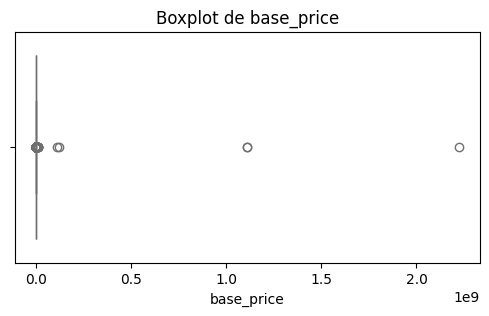

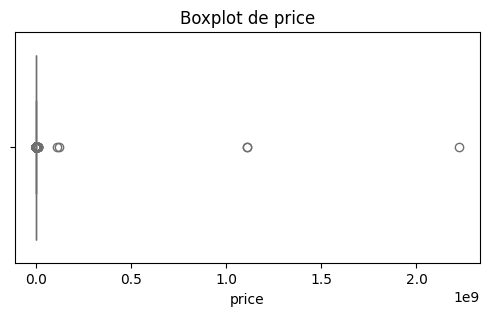

,columna,número_outliers,porcentaje_outliers,lim_inf,lim_sup
0,base_price,14629,14.64%,-975.0,1865.0
1,price,14629,14.64%,-975.0,1865.0


In [24]:
analizador.outliers(df_cleaned4,['base_price','price'],1.5,True)

In [25]:
#Vamos a marcar la base de datos de estos outliers con un umbral de 1.5
df_cleaned4['outlier_price'] = np.where(df_cleaned4['price']>1865,1,0)

In [26]:
analizador.guardar_csv(df_cleaned4)

2025-10-02 12:42:30,618 [INFO] Guardando CSV a la ruta: /home/cesar/Escritorio/Challenge Meli/test_meli/data/data_proccesed.csv
